In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from src.models.motion_environment_factory import PlumeMotionNavigationEnvironmentPlumeRollingYMaxRewardWestToEastWindFactory
from src.models.action_definitions import WalkActionEnum


In [2]:
environment = PlumeMotionNavigationEnvironmentPlumeRollingYMaxRewardWestToEastWindFactory().plume_environment
environment.reset()

array([0, 2, 1])

[-3.53553391 -3.53553391]
-3.5355339059327355
post position:  [1188.87548725  409.99033971]
concentration 0.9021184795624962 0
gradient 0.012270307726527438 1
motion 1.0 1


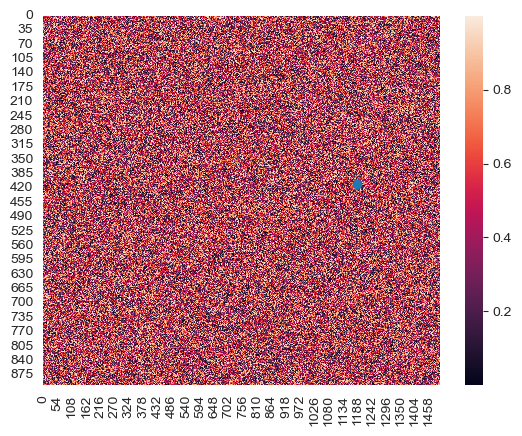

In [18]:
#for t_step in range(1000):
action = environment.action_space.sample()
pre_position = environment.fly_spatial_parameters.position
observation, _, _, _ = environment.step(action)
print('post position: ', environment.fly_spatial_parameters.position)
print('concentration', environment.odor_features.concentration, observation[0])
print('gradient', environment.odor_features.gradient, observation[1])
print('motion', environment.odor_features.motion_speed, observation[2])
sns.heatmap(environment.odor_plume.frame.T)
plt.scatter(environment.fly_spatial_parameters.position[0],environment.fly_spatial_parameters.position[1])


In [26]:
q_shape = np.append(environment.observation_space.nvec,environment.action_space.n)
q_table = np.zeros(shape=q_shape)

In [27]:
N_EPISODES = 10
ALPHA = 0.2
GAMMA = 0.1
MAX_EPSILON = 1
MIN_EPSILON = 0.5
DECAY = 0.1
rewards = np.zeros(N_EPISODES)
odor_on_values = np.zeros(N_EPISODES)
odor_off_values = np.zeros(N_EPISODES)

In [28]:
import tqdm.notebook
epsilon = MAX_EPSILON
alpha = ALPHA
rng = np.random.default_rng(seed=1234)

for episode in tqdm.notebook.tqdm(range(N_EPISODES)):
    observation = environment.reset()
    done = False
    while not done:
        explore = rng.random() < epsilon# Can pick all random numbers at start, include seed
        if explore:
            action = environment.action_space.sample()
        else:
            action = np.argmax(q_table[tuple(observation)])
        new_observation, reward, done, odor_measures = environment.step(action)
        update_index = tuple(np.append(observation,action))
        t1_value_index = tuple(new_observation)
        q_table[update_index] = \
            q_table[update_index] +\
            ALPHA * (reward + GAMMA*np.max(q_table[t1_value_index,slice(None)]) -\
            q_table[update_index])
        observation = new_observation

    epsilon = MIN_EPSILON + (MAX_EPSILON-MIN_EPSILON)*np.exp(-DECAY*episode)

  0%|          | 0/10 [00:00<?, ?it/s]

[-3.53553391 -3.53553391]
-3.5355339059327355


IndexError: index 2 is out of bounds for axis 0 with size 2

In [25]:
# Q TABLE SHAPE: 2 concentration bins, 3 gradient, 3 motion bins, 8 action bins
action_low_posGrad_mot1 = {val : q_table[0,1,1,val.value] for val in WalkActionEnum}
print(action_low_posGrad_mot1)

{<WalkActionEnum.UPWIND: 0>: 0.5555554819296784, <WalkActionEnum.DOWNWIND: 1>: 0.5555554549347054, <WalkActionEnum.CROSS_A: 2>: 5.555555555555358, <WalkActionEnum.CROSS_B: 3>: -4.444445050938447, <WalkActionEnum.UP_A: 4>: 4.091088902108667, <WalkActionEnum.UP_B: 5>: -2.9799785066077504, <WalkActionEnum.DOWN_A: 6>: 4.042197858525186, <WalkActionEnum.DOWN_B: 7>: -2.979978668761432}
